In [82]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("Datos/notas_andes.dat", skiprows=1)
#ones = np.ones((69,1))
#data = np.concatenate((ones, data), axis=1)

In [123]:
def model(x, betas):
    y = betas[0] + betas[1]*x[:,0] + betas[2]*x[:,1] + betas[3]*x[:,2] + betas[4]*x[:,3]
    return y

sigma = 0.1
n_ = 69

def like(x, y, sigma, betas, n_):
    a = (-1/(2 * sigma**2))*np.sum((y - model(x, betas))**2)
    l = sigma**(-n_) * a
    return l

In [126]:
N = 100000
def metropolis(N):
    #r = np.zeros(1)
    Y = data[:,4]
    X = data[:,:4]
    #betas = np.random.random_sample(5)
    betas = np.zeros(5)
    p = like(X, Y, sigma, betas, n_)
    pts = []
    for i in range(N): # variar betas
        betas_n = betas + np.random.uniform(-1,1)
        p_n = like(X, Y, sigma, betas_n, n_)
        if p_n >= p:
            p = p_n
            betas = betas_n
        else:
            u = np.random.rand()
            if u < p_n / p:
                p = p_n
                betas = betas_n
        pts.append(betas)
    
    pts = np.array(pts)
    return pts

samples = metropolis(N)

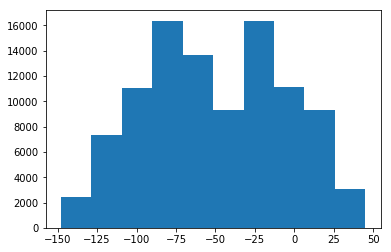

In [138]:
#samples.shape
plt.hist(samples[:,0])
plt.show()